## Exercise 1: Breast Cancer Prediction
You are going to construct a feedforward neural network to predict breast cancer.
1. You are going to use the breast cancer dataset from sklearn datasets.
2. Create a neural network with 3 hidden layers.
3. Output layer you can use either softmax or sigmoid activation.





In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
(Cancer_features, Cancer_labels) = skdatasets.load_breast_cancer(return_X_y=True,as_frame=True)
nClass = len(np.unique(np.array(Cancer_labels)))

In [3]:
nClass12 = len(np.unique(np.array(Cancer_features)))
nClass12

11998

In [4]:
seed = 12345
x_train, x_test, y_train, y_test = train_test_split(Cancer_features, Cancer_labels, test_size=0.1, random_state=None)

normalize = layers.Normalization()
normalize.adapt(x_train)

In [6]:
model = keras.Sequential()
model.add(normalize) # add input layer
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu")) # add another hidden layer
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(nClass, activation = "softmax")) 

In [7]:
model.compile(optimizer = "adamax", loss = "sparse_categorical_crossentropy", metrics= "accuracy")

In [8]:
BATCH_SIZE = 64
EPOCHS = 10

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=BATCH_SIZE, epochs= EPOCHS)

Epoch 1/10
8/8 [==============================] - 1s 68ms/step - loss: 0.6973 - accuracy: 0.4805 - val_loss: 0.6067 - val_accuracy: 0.8246
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6060 - accuracy: 0.8027 - val_loss: 0.5225 - val_accuracy: 0.9649
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 0.5308 - accuracy: 0.8887 - val_loss: 0.4423 - val_accuracy: 0.9649
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.4580 - accuracy: 0.9121 - val_loss: 0.3619 - val_accuracy: 0.9649
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.9219 - val_loss: 0.2870 - val_accuracy: 0.9825
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.3206 - accuracy: 0.9355 - val_loss: 0.2211 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.2649 - accuracy: 0.9355 - val_loss: 0.1698 - val_accuracy: 1.0000
Epoch 8/10
8/8 [===============

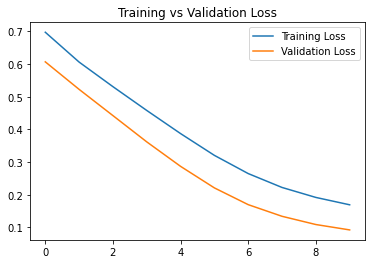

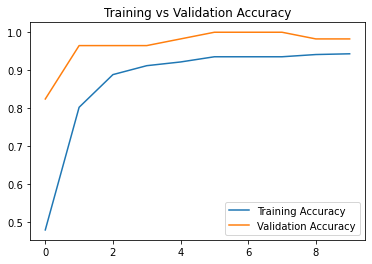

<Figure size 432x288 with 0 Axes>

In [9]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_x_axis = history.epoch

import matplotlib.pyplot as plt
plt.plot(epochs_x_axis, training_loss, label = "Training Loss")
plt.plot(epochs_x_axis, val_loss, label = "Validation Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.figure()

plt.plot(epochs_x_axis, training_acc, label = "Training Accuracy")
plt.plot(epochs_x_axis, val_acc, label = "Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.show()